# NB and Logistic Regression Project 

Welcome to NB and Logistic Regression Project! Go ahead and follow the directions below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Build a classification model which will recognise the activities through the mobile sensor like walking, walking_upstairs  ,walking_downstairs ,sitting  ,standing,lying.The topic Human Activity recognition is in research and has its own advantages like anomaly detection, for healthy diet maintenance fitness bands are used , measuring stress level ,for monitoring employees ,for heartbeat pulse rate etc. In this project we are going to focus on  the dataset which was carried out through experiments with a group of 30 volunteers wearing a smartphone.The experiments have been video-recorded to label the data manually.The  main motto is to use the dataset and work with the libraries like scikit learn and machine learning related libraries and algorithms while training.**

# <font color='red'>Download and submit only HTML file</font>

# Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from datetime import datetime
import itertools
from sklearn.linear_model import LogisticRegression
from tabulate import tabulate


# EDA and Basic Data Preprocessing and Preparation [Marks:2]
**If trying auto EDA do it in a different notebook and only highlight important, interesting or unusual pattern that you noticed in the data**

<font color='red'>Give justification for your choices and techniques used for every step</font>

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DHRUV AGRAWAL - human_activity.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
data.shape

(7352, 563)

In [ ]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [ ]:
data.subject.unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30])

In [ ]:
data.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

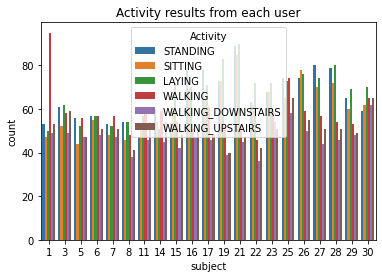

In [ ]:
sb.countplot(x='subject',hue='Activity', data = data)
plt.title('Activity results from each user')
plt.show()

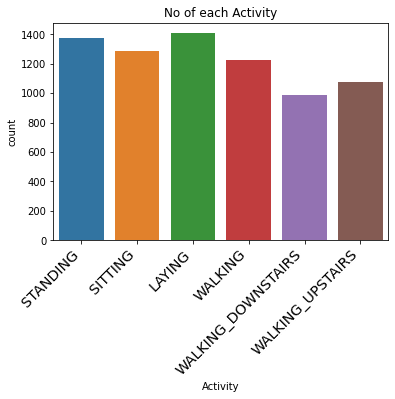

In [ ]:
sb.countplot(x = data.Activity)
plt.title('No of each Activity')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

In [ ]:
columns = data.columns
columns = columns.str.replace('[-]', '', regex= True)
columns = columns.str.replace('[,]','', regex= True)
columns = columns.str.replace('[()]','', regex= True)
data.columns = columns
data.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

## Null/Outlier Treatment

In [ ]:
data.isnull().values.sum()

0

Checking with the above snippet provides us that the dataset has no NULL values present. Hence no NULL treatment required

In [ ]:
sum(data.duplicated())

0

Checking with the above snippet provides us that the dataset has no duplicate values present.

## Remove non-Important Features

Differentiating between movement and still activities is easier as for still activities information from motion sensors are useless.
Information from motion sensors only useful for movement activities like WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, WALKING

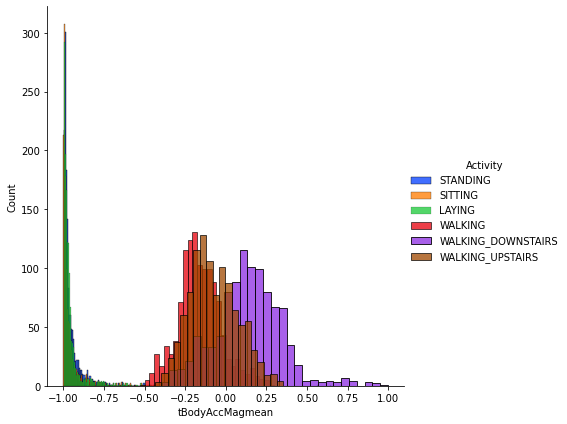

In [ ]:
sb.set_palette("bright")
facetgrid = sb.FacetGrid(data, hue="Activity", height=6)
facetgrid.map(sb.histplot,'tBodyAccMagmean', element ="bars").add_legend()
plt.show()

Laying can be easily be classified using single parameter i.e angleX,gravityMean. which means if angleX,gravityMean > 0 then activity is laying.

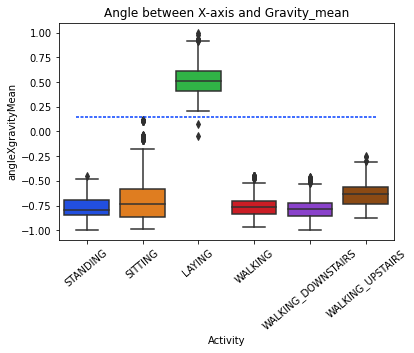

In [ ]:
sb.boxplot(x='Activity', y='angleXgravityMean', data=data)
plt.axhline(y=0.15, xmin=0.05, xmax=0.95,dashes=(2,1))
plt.title('Angle between X-axis and Gravity_mean')
plt.xticks(rotation = 40)
plt.show()

## Split Predictor and Target Variables

In [ ]:
y = data[["Activity"]].copy()

In [ ]:
X= data.drop(["Activity"], axis=1)

## Split Training and Testing Data Set





In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5146, 562) (2206, 562) (5146, 1) (2206, 1)


## Standardize the Variables

In [ ]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
standardized_df = pd.DataFrame(standardized_data, columns=X.columns)
print(standardized_df)

      tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0          0.200642      -0.063683      -0.419628     -0.868814     -0.939441   
1          0.055948       0.031486      -0.253908     -0.875426     -0.923902   
2          0.073515      -0.043416      -0.076295     -0.869039     -0.907760   
3          0.066696      -0.208422      -0.249712     -0.870626     -0.940022   
4          0.030469       0.027587      -0.109848     -0.875188     -0.934878   
...             ...            ...            ...           ...           ...   
7347       0.358361      -0.967904      -1.273005      0.913859      1.095963   
7348      -0.009044       0.243731      -0.676787      0.824887      1.026150   
7349      -0.015668       0.016781       1.132221      0.862975      0.810002   
7350       0.215866      -0.028123      -0.867710      0.860922      0.794902   
7351       1.096202       0.129199      -1.672681      0.749198      0.843051   

      tBodyAccstdZ  tBodyAc

# Train Model using different variations of NB [Marks:2+1]
**Breifly describe & Justify why one of the variant performed better compared to others**

In [ ]:
models = []
accuracy_test = []
precision_test = []
recall_test = []
F1_test = []
train_time = []
test_time = []

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Gaussian Naive Bayes**

In [ ]:
models.append('GaussianNB')
gnb = GaussianNB()

train_start_time = datetime.now()
gnb.fit(X_train,np.ravel(y_train))
train_end_time = datetime.now()
train_time.append((train_end_time - train_start_time).total_seconds())

test_start_time = datetime.now()
y_pred = gnb.predict(X_test)
test_end_time = datetime.now()
test_time.append((test_end_time - test_start_time).total_seconds())

accuracy_test.append(accuracy_score(y_test, y_pred))
F1_test.append(f1_score(y_test, y_pred, average='weighted'))
precision_test.append(precision_score(y_test, y_pred, average='weighted'))
recall_test.append(recall_score(y_test, y_pred, average='macro'))

**Bernoulli Naive Bayes**

In [ ]:
bnb = BernoulliNB()
models.append('BernoulliNB')

train_start_time = datetime.now()
bnb.fit(X_train,np.ravel(y_train))
train_end_time = datetime.now()
train_time.append((train_end_time - train_start_time).total_seconds())

test_start_time = datetime.now()
y_pred = bnb.predict(X_test)
test_end_time = datetime.now()
test_time.append((test_end_time - test_start_time).total_seconds())

accuracy_test.append(accuracy_score(y_test, y_pred))
F1_test.append(f1_score(y_test, y_pred, average='weighted'))
precision_test.append(precision_score(y_test, y_pred, average='weighted'))
recall_test.append(recall_score(y_test, y_pred, average='macro'))

**Complement Naive Bayes**


In [ ]:
cnb = ComplementNB()
models.append('ComplementNB')

train_start_time = datetime.now()
cnb.fit(X_train,np.ravel(y_train))
train_end_time = datetime.now()
train_time.append((train_end_time - train_start_time).total_seconds())

test_start_time = datetime.now()
y_pred = cnb.predict(X_test)
test_end_time = datetime.now()
test_time.append((test_end_time - test_start_time).total_seconds())


accuracy_test.append(accuracy_score(y_test, y_pred))
F1_test.append(f1_score(y_test, y_pred, average='weighted'))
precision_test.append(precision_score(y_test, y_pred, average='weighted'))
recall_test.append(recall_score(y_test, y_pred, average='macro'))

**Multinomial Naive Bayes**

In [ ]:
mnb = MultinomialNB()
models.append('MultinomialNB')

train_start_time = datetime.now()
mnb.fit(X_train,np.ravel(y_train))
train_end_time = datetime.now()
train_time.append((train_end_time - train_start_time).total_seconds())

test_start_time = datetime.now()
y_pred = mnb.predict(X_test)
test_end_time = datetime.now()
test_time.append((test_end_time - test_start_time).total_seconds())

accuracy_test.append(accuracy_score(y_test, y_pred))
F1_test.append(f1_score(y_test, y_pred, average='weighted'))
precision_test.append(precision_score(y_test, y_pred, average='weighted'))
recall_test.append(recall_score(y_test, y_pred, average='macro'))

# Compare time and accuracy of different NB algos [Marks:0.5]

In [ ]:
# evaluate each model in turn
df = pd.DataFrame({"Model ": models, "Accuracy": accuracy_test, "F1 score": F1_test, "Precision":precision_test, "Recall":recall_test})
print(tabulate(df, headers = 'keys', tablefmt = 'psql'))
print('\n')
df1 = pd.DataFrame({"Model ": models, "Training Time": train_time, "Testing Time": test_time})
print(tabulate(df1, headers = 'keys', tablefmt = 'psql'))

+----+---------------+------------+------------+-------------+----------+
|    | Model         |   Accuracy |   F1 score |   Precision |   Recall |
|----+---------------+------------+------------+-------------+----------|
|  0 | GaussianNB    |   0.669991 |   0.648463 |    0.794344 | 0.688884 |
|  1 | BernoulliNB   |   0.639166 |   0.621031 |    0.634884 | 0.62025  |
|  2 | ComplementNB  |   0.617407 |   0.537017 |    0.783263 | 0.602566 |
|  3 | MultinomialNB |   0.859927 |   0.860045 |    0.865864 | 0.85632  |
+----+---------------+------------+------------+-------------+----------+


+----+---------------+-----------------+----------------+
|    | Model         |   Training Time |   Testing Time |
|----+---------------+-----------------+----------------|
|  0 | GaussianNB    |        0.043859 |       0.030131 |
|  1 | BernoulliNB   |        0.058265 |       0.01742  |
|  2 | ComplementNB  |        0.029966 |       0.007099 |
|  3 | MultinomialNB |        0.024123 |       0.004452 |


Multinomial Naive Bayes works better for multiclass classification problems such as Activity Classification

# Train Model with Logistic Regression with different solver and penalty [Marks:2+1]
**Justify why one of the solver or penalty performed better compared to others**

In [ ]:
names = []
models1 = []
accuracy_train1 = []
accuracy_test1 = []
train_time1 = []
test_time1 = []

In [ ]:

logisticRegr1 = LogisticRegression(penalty ='none',solver = 'saga', max_iter=3500)
names.append('None - Saga')
models1.append(logisticRegr1)


In [ ]:
def perform_model(model, X_train, y_train, X_test, y_test, class_labels):
  logisticRegr = model
  train_start_time = datetime.now()
  logisticRegr.fit(X_train, np.ravel(y_train))
  train_y = logisticRegr.predict(X_train)
  train_end_time = datetime.now()
  train_time1.append((train_end_time - train_start_time).total_seconds())

  test_start_time = datetime.now()
  y_pred = logisticRegr.predict(X_test)
  test_end_time = datetime.now()
  test_time1.append((test_end_time - test_start_time).total_seconds())

  accuracy_train1.append(accuracy_score(train_y, y_train))
  accuracy_test1.append(accuracy_score(y_test, y_pred))

In [ ]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
for model in models1:
  perform_model(model,X_train,y_train,X_test,y_test,labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


# Compare time and accuracy of different Logistic Regression algos [Marks:0.5]

In [ ]:
df2 = pd.DataFrame({"Penalty - Solver ": names, "Accuracy Test": accuracy_test1, "Accuracy Train": accuracy_train1})
print(tabulate(df2, headers = 'keys', tablefmt = 'psql'))
print('\n')
df3 = pd.DataFrame({"Penalty - Solver ": names, "Training Time": train_time1, "Testing Time": test_time1})
print(tabulate(df3, headers = 'keys', tablefmt = 'psql'))

+----+---------------------+-----------------+------------------+
|    | Penalty - Solver    |   Accuracy Test |   Accuracy Train |
|----+---------------------+-----------------+------------------|
|  0 | None - Saga         |        0.980054 |         0.997668 |
+----+---------------------+-----------------+------------------+


+----+---------------------+-----------------+----------------+
|    | Penalty - Solver    |   Training Time |   Testing Time |
|----+---------------------+-----------------+----------------|
|  0 | None - Saga         |         345.355 |        0.00526 |
+----+---------------------+-----------------+----------------+


# Plot confusion Matrix for the final model selected [Marks:1]

In [ ]:
model = LogisticRegression(penalty ='none', C=1.0,solver = 'saga', max_iter=500)
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
classes=labels
model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
   
cm = metrics.confusion_matrix(y_test, y_pred)
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)

title='Confusion matrix'

plt.imshow(cm, interpolation='nearest')
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=40)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], d), horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
    
print('Classifiction Report')
classification_report = metrics.classification_report(y_test, y_pred)
print(classification_report)

In [ ]:
from sklearn.manifold import TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.004s...
[t-SNE] Computed neighbors for 7352 samples in 2.591s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.189038
[t-SNE] Computed conditional probabilities in 0.088s
[t-SNE] Iteration 50: error = 128.9978943, gradient norm = 0.0674464 (50 iterations in 2.836s)
[t-SNE] Iteration 100: error = 110.4338074, gradient norm = 0.0371445 (50 iterations in 2.002s)
[t-SNE] Iteration 150: error = 103.8542786, gradient norm =

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


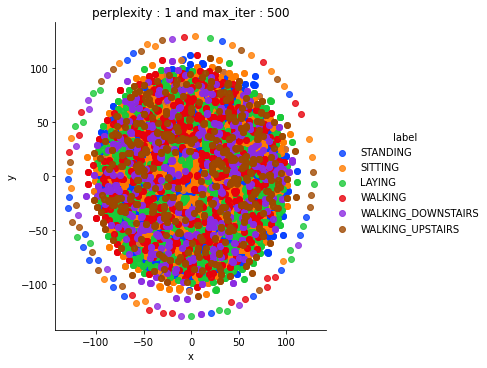

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...
[t-SNE] Computed neighbors for 7352 samples in 1.867s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.056s
[t-SNE] Iteration 50: error = 113.9425659, gradient norm = 0.0199268 (50 iterations in 2.909s)
[t-SNE] Iteration 100: error = 97.0782394, gradient norm = 0.0152451 (50 iterations in 1.852s)
[t-SNE] Iteration 150: error = 92.9504395, gradient norm = 

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


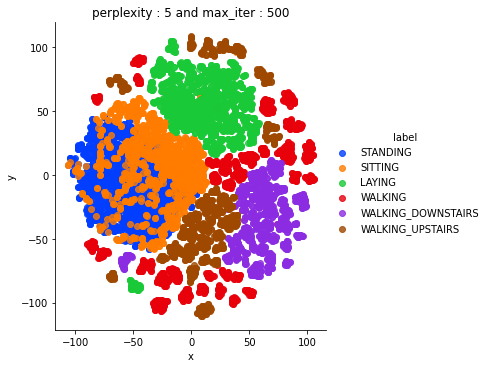

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.007s...
[t-SNE] Computed neighbors for 7352 samples in 1.848s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.102s
[t-SNE] Iteration 50: error = 105.6700745, gradient norm = 0.0196425 (50 iterations in 2.677s)
[t-SNE] Iteration 100: error = 90.5110245, gradient norm = 0.0114359 (50 iterations in 1.947s)
[t-SNE] Iteration 150: error = 87.3990326, gradient norm = 

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


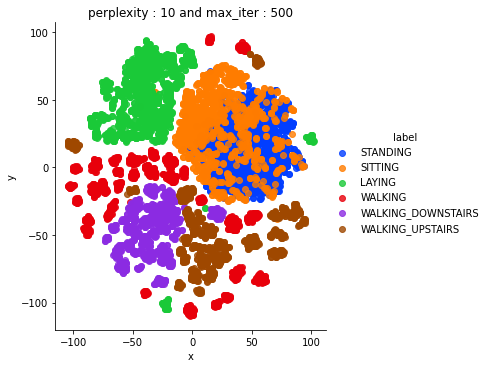

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.005s...
[t-SNE] Computed neighbors for 7352 samples in 1.911s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.189s
[t-SNE] Iteration 50: error = 97.3694305, gradient norm = 0.0207804 (50 iterations in 3.250s)
[t-SNE] Iteration 100: error = 84.1295624, gradient norm = 0.0071308 (50 iterations in 2.306s)
[t-SNE] Iteration 150: error = 81.9646301, gradient norm = 0

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


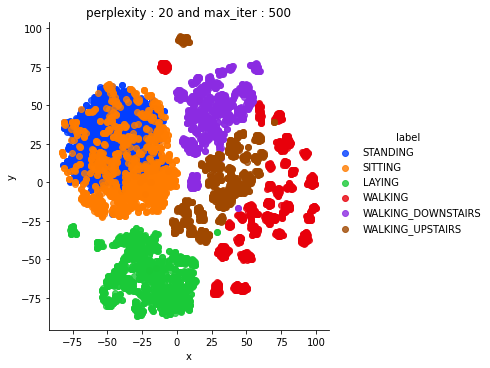

In [ ]:
X_data= data.drop(['subject', 'Activity'], axis=1)
y_data = data['Activity']
perplexities =[1,5,10,20]
n_iter=500

img_name_prefix='t-sne'
        
for index,perplexity in enumerate(perplexities):
    X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
    df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
    sb.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=5, palette="bright")
    plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
    plt.show()